# Perform whole process of optzer on jupyter

The example on the `README.ipynb` is just a showcase of commandline workflow on jupyter notebook. This notebook will show the same thing purely on jupyter notebook (purely on python).

In [1]:
import numpy as np
from optzer import Optzer
from simple_func import line
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')

In [2]:
import optzer
optzer.__version__

'0.2.11'

In [3]:
!make init

rm -f in.vars.optzer.[1-9]* *~
rm -rf out.cs.* subdir_*
rm -rf db.optzer.json out.optzer in.vars.optzer.best


In [4]:
# Generate reference data, g(x) = a*x +b +eps, where eps is a Gaussian noise.
xs = np.linspace(-1.0, 1.0, 100)
rng = np.random.RandomState(42)
a_ = 1.0
b_ = 0.0
refd = line(xs,a_,b_) + 0.1*rng.randn(len(xs))

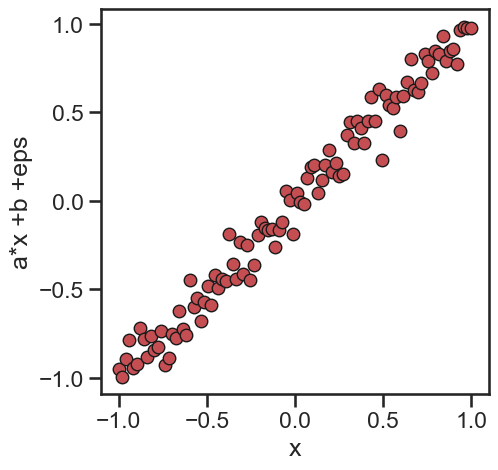

In [5]:
plt.figure(figsize=(5,5))
plt.plot(xs,refd,'ro',mec='k',label='ref')
plt.xlabel('x')
plt.ylabel('a*x +b +eps')
plt.show()

In [6]:
opt = Optzer(nproc=5, seed=42, vnames=['a','b'])

In [7]:
vs = {'a': -0.4, 'b':2.0}
slims = {'a':[-10.0, 10.0], 'b':[-10.0, 10.0]}
hlims = {'a':[-10.0, 10.0], 'b':[-10.0, 10.0]}
opt.set_variables(vs, slims, hlims)

In [8]:
def loss_func(vs, **kwargs):
    """Loss function that computes loss value from a given variables."""
    a = vs['a']
    b = vs['b']
    refd = kwargs['refdata'] 
    xs = kwargs['xs']
    yd = line(xs,a,b)
    loss = ((yd-refd)**2).sum() /len(xs)
    losses = []
    for i,xi in enumerate(xs):
        losses.append((yd[i]-refd[i])**2)
    return loss, losses

In [9]:
options = {
    'refdata':refd,
    'xs':xs,
    'num_iteration': 50,
    'opt_method': 'cs',
    'num_individuals': 4,
    'cs_fraction':  0.25,
    'update_vrange':  10,
    'fval_upper_limit':  100.0,
}

In [10]:
opt.optimize(loss_func, **options)
# This wiil take a while, but the cell returns control immediately.
# You can find db.optzer.json file when the above opt.optimize(...) actually finishes.

 Update variable ranges
               a:   -9.918   10.000
               b:   -8.519    9.318
 Update variable ranges
               a:   -9.918   10.000
               b:   -9.346    9.318
 Update variable ranges
               a:   -3.793    5.698
               b:   -2.600    2.577
 Update variable ranges
               a:   -0.832    2.886
               b:   -1.144    1.123
 Update variable ranges
               a:   -0.014    2.068
               b:   -0.634    0.613
 Finished since it exceeds the max iteration


In [11]:
!head db.optzer.json
!tail db.optzer.json

{"iid":1,"loss":4.7229105521,"gen":0,"a":-0.4,"b":2.0,"losses":[11.2247016255,11.4619054799,10.7496473929,10.0036108206,10.9579803218,10.7715210743,9.4395296101,9.7673546335,10.3728106604,9.5555084205,10.007817579,9.8311211021,9.2197846767,10.3919274254,10.0903567369,9.1929410973,9.2949244859,8.3391993201,8.8906034601,9.0231546702,7.2241535739,8.0011942708,7.678579314,8.3634891397,7.7042351079,7.1922498767,7.7269868371,6.7537293944,7.1189960178,6.8067106583,6.8209027845,5.4662650644,6.2315097829,6.6174360268,5.5513455006,6.4119627739,5.5739990696,6.4999623138,6.0421136808,5.1860204736,4.8173235504,4.9429170972,4.9447796061,4.9015690827,5.3056872839,4.8367320035,4.6012557023,3.861204753,4.0323146564,4.7980511804,3.8159676406,3.9843512776,3.9879496067,3.3850203222,3.1315808534,3.0671092469,3.6103168072,3.3080335326,2.9806973365,2.6691672239,3.065817942,2.8673101772,3.0873938872,3.0199574615,2.2760139833,2.0334536368,2.3732460696,1.9731742666,2.0753400988,2.2891593893,1.9156288922,1.53293

In [12]:
from optzer.io import read_db_optzer
db = read_db_optzer('db.optzer.json')
db

,iid,loss,gen,a,b,losses
0,1,4.722911,0,-0.400000,2.000000,"[11.2247016255, 11.4619054799, 10.7496473929, ..."
1,2,85.657057,0,-2.509198,9.014286,"[155.5959941925, 155.4115603001, 151.706743314..."
2,3,8.431036,0,4.639879,1.973170,"[2.9459622528000002, 2.4943458425, 2.510362002..."
3,4,68.352526,0,-6.879627,-6.880110,"[0.9022077706, 0.7295886911, 0.3799242658, 0.1..."
4,5,4.506996,1,-0.666576,1.872827,"[12.1782235175, 12.3873082146, 11.6096749936, ..."
...,...,...,...,...,...,...
249,250,0.136580,50,0.392361,-0.012283,"[0.2977715568, 0.3562977195, 0.2560724049, 0.1..."
250,251,1.293479,50,0.981377,1.123242,"[1.192885101, 1.3347514228000001, 1.1585140981..."
251,252,0.019394,50,0.852311,-0.066232,"[0.0010103369, 0.0085192958, 0.0001149427, 0.0..."
252,253,1.274936,50,2.886027,0.246453,"[2.8535492197, 2.5206190852, 2.6508382412, 2.8..."


In [13]:
bestidx = db.loss.argmin()
best = db.iloc[bestidx].to_dict()
best

{'iid': 167,
 'loss': 0.0082870431,
 'gen': 33,
 'a': 1.0270408534,
 'b': -0.0103990689,
 'losses': [0.0075883852000000005,
  0.0005320963,
  0.0102244892,
  0.0353831406,
  0.0001401729,
  0.0001275731,
  0.036896080500000004,
  0.012179205200000001,
  0.0001925921,
  0.0075306656,
  0.000206343,
  0.00022928410000000002,
  0.0030338936,
  0.0259176965,
  0.0203632269,
  0.0007280838,
  0.0052683888,
  0.0035495259000000003,
  0.0039936741000000005,
  0.013034735300000001,
  0.0299564101,
  1.14949e-05,
  0.001035204,
  0.0138296032,
  0.0009065559000000001,
  0.0012162785,
  0.0084387578,
  0.0036312878000000002,
  0.0014379099000000001,
  5.73287e-05,
  0.0015303067,
  0.042326094,
  0.000346304,
  0.0074577743,
  0.010225436000000001,
  0.0107670171,
  0.0014946116,
  0.0319477892,
  0.0134878765,
  0.0012831534000000001,
  0.0079986882,
  0.0010355058,
  8.5928e-06,
  0.0002611612,
  0.018076423600000002,
  0.0034960131,
  0.0011392534000000001,
  0.0138008435,
  0.0020775654,
  0

In [14]:
a = best['a']
b = best['b']
ys = line(xs,a,b)

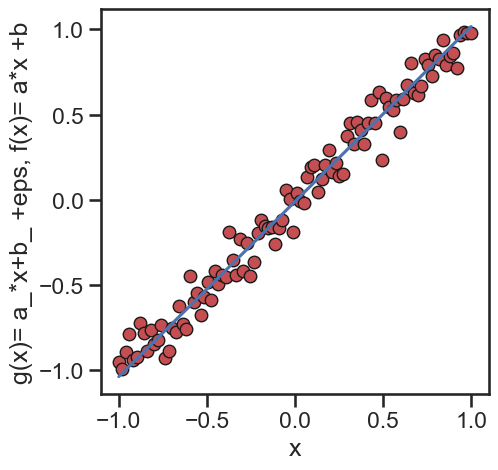

In [15]:
plt.figure(figsize=(5,5))
plt.plot(xs,refd,'ro',mec='k',label='reference data')
plt.plot(xs,ys,'b-',label='optimized line')
plt.xlabel('x')
plt.ylabel('g(x)= a_*x+b_ +eps, f(x)= a*x +b')
plt.show()